In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [3]:
class NTreeNode:
    def __init__(self, val):
        self.val = val
        self.children = []
        
def get_value(no:NTreeNode):
        return no.val
def get_children(no:NTreeNode):
        return no.children

In [4]:
# node key level = 
def node_validate(t:dict)-> bool:
    node_required = ['hostname', 'key', 'queues', 'children', 'parent']
    node_key_required = ['node_index', 'level', 'type']
    queue_required = ['key', 'url', 'hook', 'topic']
    queue_key_required = ['node_index', 'tier_index', 'mode', 'type']
    
    def queues_validator(qt:list)->bool:
        for i in qt:
            if list(i.keys()) == queue_required:
                if list(i['key']) == queue_key_required:
                    continue
                else :
                    return False
            else :
                return False
        return True
    
    if list(t.keys()) != node_required:
        return False
    elif list(t['key'].keys())!= node_key_required:
        return False
    elif not queues_validator(t['queues']):
        return False
    
    return True

In [5]:
# def nodes_validator(configs:dict)-> bool:
#     return True if sum(list(map(node_validate, list(configs.values())))) == len(configs) else False

def nodes_validator(configs:list)-> bool:
    return True if sum(list(map(node_validate, configs))) == len(configs) else False

In [6]:
nodes_validator(nodes.values())

NameError: name 'nodes' is not defined

In [9]:
file =open("config_3.json", "r")
file_contents = file.read()

In [10]:
configs = json.loads(file_contents)

In [17]:
configs[-1]

{'hostname': 'ares-comp-1',
 'key': {'node_index': 0, 'level': 0, 'type': 'CLUSTER'},
 'queues': [{'key': {'node_index': 0,
    'tier_index': 0,
    'mode': 'SERVER',
    'type': {'value': 'LOAD', 'interval': 10000}},
   'url': 'tcp://ares-comp-1',
   'hook': 'LOAD',
   'topic': 'CLUSTER_LOAD'},
  {'key': {'node_index': 1,
    'tier_index': 0,
    'mode': 'SERVER',
    'type': {'value': 'CAPACITY', 'interval': 10000}},
   'url': 'tcp://ares-comp-1',
   'hook': 'CAPACITY',
   'topic': 'CLUSTER_CAPACITY'},
  {'key': {'node_index': 2,
    'tier_index': 0,
    'mode': 'SERVER',
    'type': {'value': 'AVAILABILITY', 'interval': 10000}},
   'url': 'tcp://ares-comp-1',
   'hook': 'AVAILABILITY',
   'topic': 'CLUSTER_AVAILABILITY'}],
 'children': [4, 5, 6],
 'parent': -1}

In [18]:
nodes = {}
for i in configs:
    if i["key"]["node_index"] not in nodes.keys():
        nodes[i["key"]["node_index"]] = NTreeNode(f'{i["key"]["node_index"]}')
    for j in i["children"]:
        if j not in nodes.keys():
            nodes[j] = NTreeNode(f'{j}')
        nodes[i["key"]["node_index"]].children.append(nodes[j])
#         G.add_edge(i["key"]["node_index"], j)

In [19]:
from ascii_tree import make_and_print_tree

In [21]:
make_and_print_tree(nodes[0], get_value, get_children)

page: 0
                         ┌────┐
                         │    │
                         │ 0  ├──────────────────────────────────────────────────────────────────────┐
                         │    │           │                                                          │
                         └────┘           │                                                          │
                                          │                                                          │
                                          │                                                          │
                                          │                                                          │
                                          │                                                          │
                                          │                                                          │
                                        ┌─┴──┐                                            ┌──────────┴──

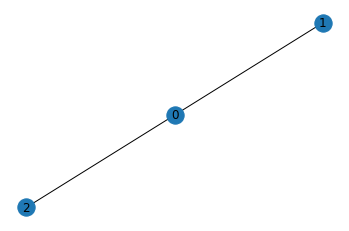

In [99]:
pos = graphviz_layout(G, prog="dot")
nx.draw_networkx_labels(G,pos=pos)

nx.draw(G,with_labels = True)
plt.show()

In [148]:
get_value(nodes[0])

AttributeError: 'NTreeNode' object has no attribute 'value'

In [149]:
node  = nodes[0]

In [163]:
configs[0]['queues'][0]['key']['type'].keys()

dict_keys(['value', 'interval'])

In [160]:
configs[0]['queues'][]

[{'key': {'node_index': 0,
   'tier_index': 0,
   'mode': 'SERVER',
   'type': {'value': 'TIER_CAPACITY', 'interval': 10000}},
  'url': 'tcp://localhost',
  'hook': 'NULL',
  'topic': 'TIER_CAPACITY'}]

In [214]:
queue_node_index = 2
queue_node_tier_index = 0
queue_node_type_value = "NODE_CAPACITY"
queue_node_type_interval = 10000
queue_mode = "SERVER"
queue_url = "tcp://localhost"
queue_hook = "CAPACITY"
queue_topic = "NODE_CAPACITY"

In [215]:
queue_config_template = f'''
{{  
    "key":{{
    "node_index": {queue_node_index},
    "tier_index": {queue_node_tier_index},
    "mode" : "{queue_mode}",
    "type": {{
        "value": "{queue_node_type_value}",
        "interval": {queue_node_type_interval}
        }}
    }},
    "url": "{queue_url}",
    "hook": "{queue_hook}",
    "topic": "{queue_topic}"
}}
'''

In [234]:
queue_list = '['+ queue_config_template+']'

In [ ]:
def queue_gen(queue_node_index, queue_node_tier_index, )

In [231]:
node_hostname = "localhost"
node_key_node_index = 2
node_key_level = 1
node_key_type = "LEAF"
node_children_list = []
node_parent = 0

In [232]:
node_template = f'''
{{
    "hostname": "{node_hostname}",
    "key" : {{
      "node_index": {node_key_node_index},
      "level": {node_key_level},
      "type": "{node_key_type}"
    }},
    "queues": {queue_list},
    "children": {node_children_list},
    "parent": {node_parent}
  }}

'''

In [358]:
for ti, tl in enumerate(tier_list):
    tier_level = tl.split(':')[0][tl.find('T')+1:-1]
    node_key_level = tier_level
    print(node_key_level)

11
2
3


In [247]:
i = node_list[0]

In [235]:
k = json.loads(node_template)

In [336]:
tier_list[1].split(':')[0][tier_list[1].find('T')+1:-1]

'2'

In [493]:
with open("nodelist") as node_list_file:
    node_list = list(map(lambda x: x.strip(),node_list_file.readlines()))
    
with open("queuelist") as queue_list_file:
    queue_list = list(map(lambda x: x.strip(),queue_list_file.readlines()))
    
with open("tierlist") as tier_list_file:
    tier_list = list(map(lambda x: x.strip(),tier_list_file.readlines()))
    
with open("clusterlist") as tier_list_file:
    cluster_list = list(map(lambda x: x.strip(),tier_list_file.readlines()))

In [509]:
node_list[-1]

'ares-comp-64'

In [513]:
nodes = {}
for k in node_list:
    node = {}

    queues = []
    
    node_hostname = k
    node_key_node_index = k.split('-')[-1]
    node_key_type = "LEAF"
    node_children_list = []
    node_parent = 0
    queue_template_list = '['

    for ti, tl in enumerate(tier_list):
        tier_level = tl.split(':')[0][tl.find('T')+1:-1]
        node_key_level = tier_level if node_key_type != "LEAF" else -1 
        queue = {}
        for i, j in enumerate(queue_list):
            queue = {}
        
            queue_node_index = i
            queue_node_tier_index = tier_level
            queue_node_type_value = j
            queue_node_type_interval = 10000
            queue_mode = "SERVER"
            queue_url = f"tcp://{k}"
            queue_hook = j
            queue_topic = f'{node_key_type}_{j}'
            
            queue["key"] = {"node_index": queue_node_index,
                            "tier_index": queue_node_tier_index,
                            "mode" : queue_mode,
                            "type": {
                                "value": queue_node_type_value,
                                "interval": queue_node_type_interval
                            }
                           }
            queue["url"] = queue_url
            queue["hook"] = queue_hook
            queue["topic"] = queue_topic
            
            queues.append(queue)
    
    node["hostname"] = node_hostname
    node["key"] = { "node_index" : node_key_node_index, "level" : node_key_level, "type" : node_key_type }
    node["queues"] = queues
    node["children"] = node_children_list
    node["parent"] = node_parent
    

    nodes[int(node_key_node_index)] = node

In [514]:
nodes_validator(nodes.values())

True

In [603]:
tier_nodes={}
node_key_type = "TIER"
node_children_list = []
node_parent = 0

for ti, tl in enumerate(tier_list):
    tier_level = tl.split(':')[0][tl.find('T')+1:-1]
    k = tier_list[0].split(':')[1].strip()
    node_hostname = k

    node_key_level = tier_level if node_key_type != "LEAF" else -1 
    node = {}
    queues = []
    for i, j in enumerate(queue_list):
        queue = {}

        queue_node_index = i
        queue_node_tier_index = tier_level
        queue_node_type_value = j
        queue_node_type_interval = 10000
        queue_mode = "SERVER"
        queue_url = f"tcp://{k}"
        queue_hook = j
        queue_topic = f'{node_key_type}_{j}'

        queue["key"] = {"node_index": queue_node_index,
                        "tier_index": queue_node_tier_index,
                        "mode" : queue_mode,
                        "type": {
                            "value": queue_node_type_value,
                            "interval": queue_node_type_interval
                        }
                       }
        queue["url"] = queue_url
        queue["hook"] = queue_hook
        queue["topic"] = queue_topic
        queues.append(queue)

    node["hostname"] = node_hostname
    node["key"] = { "node_index" : int(node_key_node_index)+1+ti, "level" : node_key_level, "type" : node_key_type }
    node["queues"] = queues
    node["children"] = node_children_list
    node["parent"] = node_parent

    print(int(node_key_node_index)+ti+1)
    tier_nodes[int(node_key_node_index)+1+ti] = node


1
2
3


In [604]:
list(enumerate([1,2,3]))

[(0, 1), (1, 2), (2, 3)]

In [605]:
tier_nodes

{1: {'hostname': 'ares-comp-1',
  'key': {'node_index': 1, 'level': '11', 'type': 'TIER'},
  'queues': [{'key': {'node_index': 0,
     'tier_index': '11',
     'mode': 'SERVER',
     'type': {'value': 'LOAD', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'LOAD',
    'topic': 'TIER_LOAD'},
   {'key': {'node_index': 1,
     'tier_index': '11',
     'mode': 'SERVER',
     'type': {'value': 'CAPACITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'CAPACITY',
    'topic': 'TIER_CAPACITY'},
   {'key': {'node_index': 2,
     'tier_index': '11',
     'mode': 'SERVER',
     'type': {'value': 'AVAILABILITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'AVAILABILITY',
    'topic': 'TIER_AVAILABILITY'}],
  'children': [],
  'parent': 0},
 2: {'hostname': 'ares-comp-1',
  'key': {'node_index': 2, 'level': '2', 'type': 'TIER'},
  'queues': [{'key': {'node_index': 0,
     'tier_index': '2',
     'mode': 'SERVER',
     'type': {'value': 'LOAD

In [518]:
for i in tier_nodes.keys():
    for j in nodes.keys():
        tier_nodes[i]['children'].append(j)
        nodes[j]['parent'] = i

In [519]:
tier_nodes[65]

{'hostname': 'ares-comp-1',
 'key': {'node_index': '64', 'level': '11', 'type': 'TIER'},
 'queues': [{'key': {'node_index': 0,
    'tier_index': '11',
    'mode': 'SERVER',
    'type': {'value': 'LOAD', 'interval': 10000}},
   'url': 'tcp://ares-comp-1',
   'hook': 'LOAD',
   'topic': 'TIER_LOAD'},
  {'key': {'node_index': 1,
    'tier_index': '11',
    'mode': 'SERVER',
    'type': {'value': 'CAPACITY', 'interval': 10000}},
   'url': 'tcp://ares-comp-1',
   'hook': 'CAPACITY',
   'topic': 'TIER_CAPACITY'},
  {'key': {'node_index': 2,
    'tier_index': '11',
    'mode': 'SERVER',
    'type': {'value': 'AVAILABILITY', 'interval': 10000}},
   'url': 'tcp://ares-comp-1',
   'hook': 'AVAILABILITY',
   'topic': 'TIER_AVAILABILITY'}],
 'children': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,


In [602]:
cluster_nodes={}
node_key_type = "CLUSTER"
node_children_list = []
node_parent = -1

for ti, tl in enumerate(cluster_list):
    tier_level = node_key_node_index = 0
    k = tl
    node_hostname = k

    node_key_level = tier_level if node_key_type != "LEAF" else -1 
    node = {}
    queues = []
    for i, j in enumerate(queue_list):
        queue = {}

        queue_node_index = i
        queue_node_tier_index = tier_level
        queue_node_type_value = j
        queue_node_type_interval = 10000
        queue_mode = "SERVER"
        queue_url = f"tcp://{k}"
        queue_hook = j
        queue_topic = f'{node_key_type}_{j}'

        queue["key"] = {"node_index": queue_node_index,
                        "tier_index": queue_node_tier_index,
                        "mode" : queue_mode,
                        "type": {
                            "value": queue_node_type_value,
                            "interval": queue_node_type_interval
                        }
                       }
        queue["url"] = queue_url
        queue["hook"] = queue_hook
        queue["topic"] = queue_topic
        queues.append(queue)

    node["hostname"] = node_hostname
    node["key"] = { "node_index" : node_key_node_index, "level" : node_key_level, "type" : node_key_type }
    node["queues"] = queues
    node["children"] = node_children_list
    node["parent"] = node_parent

    cluster_nodes[0-ti] = node


In [598]:
cluster_list

['ares-comp-1']

In [601]:
cluster_nodes

{0: {'hostname': 'ares-comp-1',
  'key': {'node_index': '64', 'level': 0, 'type': 'CLUSTER'},
  'queues': [{'key': {'node_index': 0,
     'tier_index': 0,
     'mode': 'SERVER',
     'type': {'value': 'LOAD', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'LOAD',
    'topic': 'CLUSTER_LOAD'},
   {'key': {'node_index': 1,
     'tier_index': 0,
     'mode': 'SERVER',
     'type': {'value': 'CAPACITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'CAPACITY',
    'topic': 'CLUSTER_CAPACITY'},
   {'key': {'node_index': 2,
     'tier_index': 0,
     'mode': 'SERVER',
     'type': {'value': 'AVAILABILITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'AVAILABILITY',
    'topic': 'CLUSTER_AVAILABILITY'}],
  'children': [65, 66, 67],
  'parent': -1}}

In [600]:
for i in cluster_nodes.keys():
    for j in tier_nodes.keys():
        cluster_nodes[i]['children'].append(j)
        tier_nodes[j]['parent'] = i

In [524]:
cluster_nodes

{0: {'hostname': 'ares-comp-1',
  'key': {'node_index': '64', 'level': 0, 'type': 'CLUSTER'},
  'queues': [{'key': {'node_index': 0,
     'tier_index': 0,
     'mode': 'SERVER',
     'type': {'value': 'LOAD', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'LOAD',
    'topic': 'CLUSTER_LOAD'},
   {'key': {'node_index': 1,
     'tier_index': 0,
     'mode': 'SERVER',
     'type': {'value': 'CAPACITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'CAPACITY',
    'topic': 'CLUSTER_CAPACITY'},
   {'key': {'node_index': 2,
     'tier_index': 0,
     'mode': 'SERVER',
     'type': {'value': 'AVAILABILITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'AVAILABILITY',
    'topic': 'CLUSTER_AVAILABILITY'}],
  'children': [65, 66, 67],
  'parent': -1}}

In [525]:
# parent is kinda useless, huh?

In [526]:
node_dict = {**nodes, **tier_nodes, **cluster_nodes}

In [528]:
json.dumps(node_dict)

'{"1": {"hostname": "ares-comp-1", "key": {"node_index": "1", "level": -1, "type": "LEAF"}, "queues": [{"key": {"node_index": 0, "tier_index": "11", "mode": "SERVER", "type": {"value": "LOAD", "interval": 10000}}, "url": "tcp://ares-comp-1", "hook": "LOAD", "topic": "LEAF_LOAD"}, {"key": {"node_index": 1, "tier_index": "11", "mode": "SERVER", "type": {"value": "CAPACITY", "interval": 10000}}, "url": "tcp://ares-comp-1", "hook": "CAPACITY", "topic": "LEAF_CAPACITY"}, {"key": {"node_index": 2, "tier_index": "11", "mode": "SERVER", "type": {"value": "AVAILABILITY", "interval": 10000}}, "url": "tcp://ares-comp-1", "hook": "AVAILABILITY", "topic": "LEAF_AVAILABILITY"}, {"key": {"node_index": 0, "tier_index": "2", "mode": "SERVER", "type": {"value": "LOAD", "interval": 10000}}, "url": "tcp://ares-comp-1", "hook": "LOAD", "topic": "LEAF_LOAD"}, {"key": {"node_index": 1, "tier_index": "2", "mode": "SERVER", "type": {"value": "CAPACITY", "interval": 10000}}, "url": "tcp://ares-comp-1", "hook": 

In [590]:

with open('config_x.json', 'w', encoding='utf-8') as f:
    json.dump(list(node_dict.values()),f)


In [579]:
json.dump?

In [556]:
list(node_dict.values())

[{'hostname': 'ares-comp-1',
  'key': {'node_index': '1', 'level': -1, 'type': 'LEAF'},
  'queues': [{'key': {'node_index': 0,
     'tier_index': '11',
     'mode': 'SERVER',
     'type': {'value': 'LOAD', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'LOAD',
    'topic': 'LEAF_LOAD'},
   {'key': {'node_index': 1,
     'tier_index': '11',
     'mode': 'SERVER',
     'type': {'value': 'CAPACITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'CAPACITY',
    'topic': 'LEAF_CAPACITY'},
   {'key': {'node_index': 2,
     'tier_index': '11',
     'mode': 'SERVER',
     'type': {'value': 'AVAILABILITY', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'AVAILABILITY',
    'topic': 'LEAF_AVAILABILITY'},
   {'key': {'node_index': 0,
     'tier_index': '2',
     'mode': 'SERVER',
     'type': {'value': 'LOAD', 'interval': 10000}},
    'url': 'tcp://ares-comp-1',
    'hook': 'LOAD',
    'topic': 'LEAF_LOAD'},
   {'key': {'node_index': 1,
     '